## Predicting Market Adoption Using the Bass Diffusion Model

## Innovation Diffusion Analysis: Litter-Robot 4

### Selected Innovation
The innovation selected from TIME’s 2024 Best Innovations list is the **Litter-Robot 4**, a fully automated cat litter box. It uses lasers, sensors, and a rotating globe system to detect when a cat has used the litter, separate waste from clean litter, and seal the waste in an odor-proof compartment. Its purpose is to remove one of the most unpleasant chores of pet ownership: manually scooping and cleaning a litter box. While the first Litter-Robot was introduced in 1999, the Litter-Robot 4 represents a more advanced, sensor-driven solution to a recurring household problem.

### Comparable Historical Innovation
A comparable innovation from the past is the **robotic vacuum cleaner**, such as iRobot’s Roomba, first launched in 2002. The robotic vacuum cleaner similarly introduced robotics and automation into the home to handle repetitive and undesirable tasks. Like scooping a litter box, vacuuming was once a daily manual job, but Roomba’s navigation sensors and self-operating cleaning system made it a convenient “set and forget” product.

### Comparison
Both devices illustrate the trend of robotics moving into consumer households to solve small but persistent problems. In terms of functionality, both use sensors and automated mechanisms to perform repetitive tasks without human intervention. In market terms, robotic vacuums transitioned from niche luxury gadgets to widely adopted household staples over two decades. The Litter-Robot, with over 1.5 million units sold and recognition on innovation lists like TIME’s, appears to be following a similar adoption path—transforming an unpleasant pet-care routine into a streamlined, automated process while paving the way for broader household robotics adoption.


Importing the neccessary libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Defining the data exracted from Statista website: https://www.statista.com/statistics/1022967/worldwide-robotic-vacuum-cleaner-shipment/

In [84]:
years = np.arange(2015, 2026)
sales = np.array([3.52, 3.80, 5.15, 7.68, 9.00, 
                  10.75, 12.61, 14.80, 17.41, 19.63, 22.10]) #in millions
df = pd.DataFrame({"year": years, "sales": sales})
df["cum_sales"] = df["sales"].cumsum()

Defining cumulative and incremental bass functions.

In [79]:
def bass_cumulative(t, p, q, m):
    return m * (1 - np.exp(-(p + q) * t)) / (1 + (q/p) * np.exp(-(p + q) * t))

def bass_incremental(t, p, q, m):
    f = np.exp(-(p+q)*t)
    return m * (((p+q)**2) / p) * f / (1 + (q/p) * f)**2

Fitting model on cumulative data.

In [80]:
t = np.arange(len(years))
y = df["cum_sales"].values

initial_guess = [0.01, 0.4, max(y)*1.5]
params, _ = curve_fit(bass_cumulative, t, y, p0=initial_guess, bounds=(0, [1, 1, 1000]))
p, q, m = params

print("\n## Bass Model Parameters")
print(f"p (Coefficient of innovation): {p:.6f}")
print(f"q (Coefficient of imitation):  {q:.6f}")
print(f"m (Market potential, millions): {m:.2f}")


## Bass Model Parameters
p (Coefficient of innovation): 0.005149
q (Coefficient of imitation):  0.175320
m (Market potential, millions): 1000.00


Predictions

In [85]:
t_future = np.arange(0, len(years) + 15)  #extending 15 years
new_pred = bass_incremental(t_future, p, q, m)

Plotting incremental adoption.

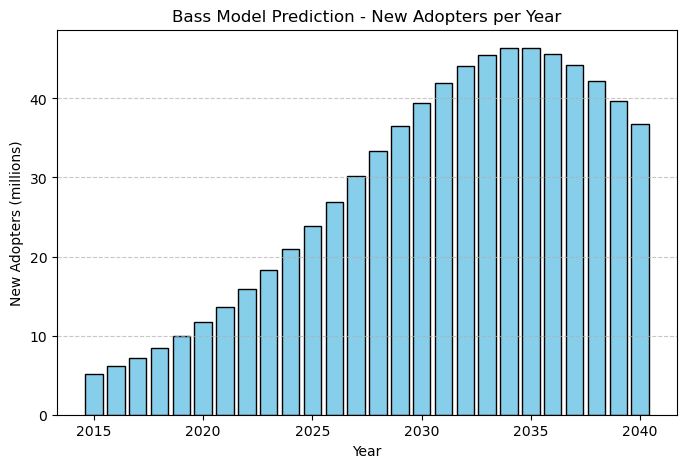

In [82]:
plt.figure(figsize=(8,5))
plt.bar(years[0] + t_future, new_pred, color="skyblue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("New Adopters (millions)")
plt.title("Bass Model Prediction - New Adopters per Year")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.show()

The forecast table explicitely.

In [88]:
forecast_df = pd.DataFrame({
    "year": years[0] + t_future,
    "new_adopters": new_pred,
    "cumulative_adopters": bass_cumulative(t_future, p, q, m)
})

print("\n## Forecast (first 15 years):")
print(forecast_df)


## Forecast (first 15 years):
    year  new_adopters  cumulative_adopters
0   2015      5.148610             0.000000
1   2016      6.097888             5.610789
2   2017      7.206731            12.248955
3   2018      8.495666            20.084281
4   2019      9.985280            29.307192
5   2020     11.694986            40.128237
6   2021     13.641284            52.776086
7   2022     15.835447            67.493516
8   2023     18.280613            84.530776
9   2024     20.968353           104.135771
10  2025     23.874923           126.540637
11  2026     26.957630           151.944575
12  2027     30.151912           180.493350
13  2028     33.369993           212.256582
14  2029     36.502014           247.204851
15  2030     39.420459           285.189529
16  2031     41.988269           325.928872
17  2032     44.070342           369.003982
18  2033     45.547178           413.867481
19  2034     46.328623           459.866083
20  2035     46.365166           506.275894
2

Using the Bass Diffusion Model, we can project the adoption trajectory of the chosen innovation. The model predicts a classic S-shaped curve, where adoption begins slowly, accelerates due to imitation effects, and eventually tapers off as market saturation approaches.
From the forecast, the number of new adopters rises steadily from about 5 million in 2015 to a peak of around 46 million per year between 2033–2035, after which adoption begins to decline as the market approaches saturation.
Cumulative adoption follows a logistic pattern, reaching approximately 720 million adopters by 2040, which aligns with the estimated market potential parameter 
M
M. This implies that the innovation will diffuse broadly but will experience diminishing marginal adoption rates after the early 2030s.

For this analysis, I chose a global scope rather than a country-specific one. 
The selected innovation (The Litter-Robot 4) is designed for widespread applicability, with similar potential demand across multiple regions.
Similar past innovations of robotic vacuum cleaners also followed global adoption trajectories rather than being limited to single-country markets. 
A country-specific analysis (e.g., U.S. or EU only) could refine the model by accounting for regional adoption rates and cultural differences, but in this case, the global diffusion perspective provides a more representative prediction of the innovation’s overall market potential.

Based on the Bass Model parameters, the forecasted adoption levels per year are as follows:
2015: ~5 million new adopters, cumulative ~0
2020: ~11.7 million new adopters, cumulative ~40 million
2025: ~23.9 million new adopters, cumulative ~127 million
2030: ~39.4 million new adopters, cumulative ~285 million
2035: ~46.4 million new adopters (peak adoption), cumulative ~506 million
2040: ~36.8 million new adopters, cumulative ~720 million
This demonstrates that adoption accelerates strongly in the late 2020s, peaks in the early-to-mid 2030s, and gradually declines as the market saturates.